In [44]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import csv 
import re
from bs4 import BeautifulSoup
import unicodedata
from selenium.webdriver.common.by import By
import pandas as pd


In [154]:
keyword = ['Myeongdong','명동','明洞','明洞餐厅', 'ミョンドン','みょんどん','韓國美食','明洞美食']

email = 'redSan0tableChez214' 
password = 'redtable0214'

In [46]:
# selenium 이용해서 드라이버 지정하고 url 불러오기
# keyword 를 포함한 url로 쓰기
driver = webdriver.Chrome(r"C:\Users\USER\Downloads\chromedriver.exe")

# 인스타그램 접속하기
insta_url = 'https://www.instargram.com' 
driver.get(insta_url)
#time.sleep(2)
time.sleep(3)

C:\Users\USER\AppData\Local\Temp/ipykernel_18672/314291897.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\USER\Downloads\chromedriver.exe")


In [47]:
# 예제 5-3 인스타계정으로 로그인하기
#email = '인스타계정입력해주세요'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
#input_id.clear()
input_id.clear()
input_id.send_keys(email)

#password = '인스타비번입력해주세요' ### 비번 정보 수정 필요
time.sleep(1)
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)
# 로그인 버튼 클릭 click
login = driver.find_element_by_css_selector("button.sqdOP.L3NKy.y3zKF")
login.click()


C:\Users\USER\AppData\Local\Temp/ipykernel_18672/2901931748.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
C:\Users\USER\AppData\Local\Temp/ipykernel_18672/2901931748.py:10: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
C:\Users\USER\AppData\Local\Temp/ipykernel_18672/2901931748.py:16: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  login = driver.find_element_by_css_selector("button.sqdOP.L3NKy.y3zKF")


In [35]:
#time.sleep(2)
## 로그인 시 팝업 창 제거
# 로그인 저장 팝업 제거
#later_button = driver.find_elements_by_class_name("sqdOP")
#later_button[0].click()
#time.sleep(1)
# 알림창 제거
alert = driver.find_elements_by_css_selector("button.aOOlW")
alertLater = alert[1]
alertLater.click()

C:\Users\USER\AppData\Local\Temp/ipykernel_18672/644256492.py:8: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  alert = driver.find_elements_by_css_selector("button.aOOlW")


In [155]:
def insta_searching(word) :
    url = insta_url + "/explore/tags/" + word
    return url

url = insta_searching(keyword[-1]) # Myeong Dong
driver.get(url)
time.sleep(1)

In [156]:
# 예제 5-6 HTML에서 첫번째 게시글 찾아 클릭하기
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

C:\Users\USER\AppData\Local\Temp/ipykernel_18672/556389458.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [157]:
# 예제 5-7 게시글 정보 가져오기
def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    # ② 본문 내용 가져오기
    try:
        # 본문에 사용자 id가 포함
        user_id_len = len(soup.select('a.sqdOP.yWX7d._8A5w5.ZIAjV')[0].text)
        
        # 본문에서 사용자 id 제거
        content = soup.select('div.C4VMK')[0].text[user_id_len:]
        content = unicodedata.normalize('NFC', content) 
        #print(" ".join(re.sub(r'#[^\s#,\\]+' ,"",content).split()))
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content.replace('수정됨',''))
    # ④ 작성일자 정보 가져오기
    #date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    date = soup.select('time._1o9PC')[0]['datetime'][:10]
    # ⑤ 좋아요 수 가져오기
    try:
        #like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
        like = int(soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll')[0].text[4:-1].replace(',',''))
    except:
        like = 0
    # ⑥ 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    # ⑦ 수집한 정보 저장하기
    #data = [" ".join(re.sub(r'#[^\s#,\\]+' ,"",content).split()), date, like, place, tags]
    data = [date, like, place, tags]
    return data

get_content(driver)

['2020-02-20',
 213,
 'Myth Jokbal',
 ['#韓國景點',
  '#首爾美食',
  '#韓國',
  '#韓國旅遊',
  '#韓國美食',
  '#韓國必吃',
  '#韓式料理',
  '#首爾必吃',
  '#明洞',
  '#弘大美食',
  '#弘大',
  '#明洞美食',
  '#豬腳116주']]

In [159]:
# 예제 5-8 다음 게시글 열기
def move_next(driver):
    #/html/body/div[6]/div[2]/div/div/button/div/span/svg
    #right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    #right = driver.find_element_by_css_selector ('button.wpO6b')
    right = driver.find_element(by = By.XPATH, value = '/html/body/div[6]/div[2]/div/div[2]/button')#'//*[@id="react-root"]/section/main/div/div[1]/article/div/div[1]/div/div[1]/div[2]/div/button[2]/div')#'/html/body/div[6]/div[2]/div/div[2]')
    
    #right = driver.find_element(by = By.XPATH, value = '/html/body/div[6]/div[2]/div/div/button/div/span')
    right.click()
    time.sleep(3)

move_next(driver)

In [162]:
results = []
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    time.sleep(0.1)
    if i%10 == 0 :
        time.sleep(2)

In [196]:
df = pd.DataFrame(results)
df.columns= ['게시물_날짜','좋아요_수','위치','해시태그']
df = df.sort_values(['게시물_날짜','좋아요_수'],ascending=[True,False])#

In [197]:
md_insta_df = pd.DataFrame([])
folder = './인스타/'
f_list = ['인스타_크롤링_해시태그_Myeongdong.xlsx', '인스타_크롤링_해시태그_明洞.xlsx','인스타_크롤링_해시태그_韓國.xlsx','인스타_크롤링_해시태그_韓國美食.xlsx','인스타_한국_해시태그_明洞美食.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    md_insta_df = md_insta_df.append(temp)

md_insta_df.columns =['content','data','like','place','tags']

In [198]:
# 해시태그가 존재하지 않고 빈 리스트만 있는 경우 제거
md = md[md['tags'].apply(lambda x : len(x)) > 2].drop_duplicates()

In [200]:
tags_total = []
for tags in md['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag.replace("#",''))

In [201]:
# 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [205]:
tag_counts.most_common(100)[:15]

[('明洞', 1119),
 ('パロディ服', 660),
 ('パロディ', 508),
 ('エルメス', 475),
 ('ショッピング', 449),
 ('myeongdong', 429),
 ('靴', 398),
 ('渡韓', 381),
 ('パロディー', 370),
 ('激安', 366),
 ('韓國', 348),
 ('首爾美食', 346),
 ('鶴橋', 338),
 ('seoul', 335),
 ('ファッションコーデ', 333)]

In [206]:
STOPWORDS = ['myeongdong','明洞','명동','서울','한국','대한민국','パロディ服','パロディ','韓國','korea','seoul','myungdong']

tag_total_selected = []
for tag in tags_total :
    if tag not in STOPWORDS :
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)[:15]

[('エルメス', 475),
 ('ショッピング', 449),
 ('靴', 398),
 ('渡韓', 381),
 ('パロディー', 370),
 ('激安', 366),
 ('首爾美食', 346),
 ('鶴橋', 338),
 ('ファッションコーデ', 333),
 ('服', 332),
 ('パロディバッグ', 330),
 ('古着', 330),
 ('古着屋', 330),
 ('お買い得', 330),
 ('お得', 330)]

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [181]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(50))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23554 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23554 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22269 missing from current fon

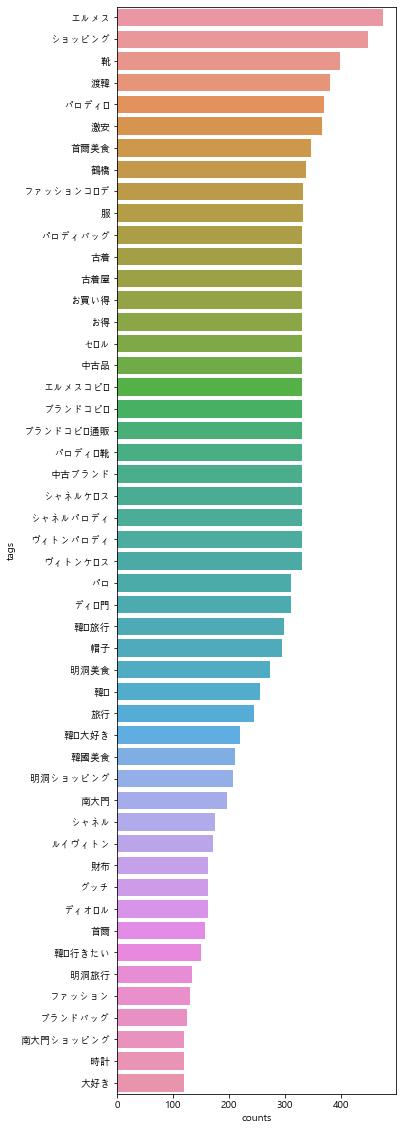

In [208]:
# 예제 5-21 막대 차트 그리기
plt.figure(figsize=(5,20)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)